**Dataset A**



In [155]:
!pip install nilearn

In [156]:
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
import numpy as np

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_yeo_2011()
masker = NiftiLabelsMasker(labels_img=yeo['thick_17'], standardize=True,  
     memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == b'F', dtype=np.int)  # gives 1 for females and 0 for males


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [157]:
print(input_variables.shape)
print(input_variables[1])
print(output_variable.shape)
print(output_variable[1])

(100, 17)
[-1.0595351  -0.7087555  -1.0957824  -1.4036431  -1.4731332  -1.5730789
 -1.4824585  -1.5399536  -0.2554358  -0.9802644  -1.4718825  -1.0394448
 -1.32662    -1.2449465  -0.6982901  -1.6121598  -0.98338103]
(100,)
1


In [158]:
y = list(range(100))
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


**Task 1**
uncertainty estimation

In [159]:
from sklearn.linear_model import LogisticRegression

# take 200 bootstraps using random indices, that way don't have to zip them or anything, just use index to pick the input and output 
bootstraps_input = []
bootstraps_output = []
bootstraps_model_coef = []
# bootstarps_model = []
for i in range(200):
  indices = np.random.choice(y,100) #common to choose sample size the same as the original, so each bootstrap should contain 100 samples.
  bootstraps_input.append(input_variables[indices]) 
  bootstraps_output.append(output_variable[indices])
  model = LogisticRegression(C=1.0).fit(input_variables[indices],output_variable[indices])
  bootstraps_model_coef.append(model.coef_)
  # bootstarps_model.append(model)

bootstraps_input = np.array(bootstraps_input)
bootstraps_output = np.array(bootstraps_output)
bootstraps_model_coef = np.array(bootstraps_model_coef)

In [160]:
bootstraps_model_coef = bootstraps_model_coef.squeeze()
bootstraps_model_coef = np.transpose(bootstraps_model_coef)
print(bootstraps_model_coef.shape)

(17, 200)


In [161]:
print(bootstraps_model_coef[0:2])

[[ 5.70411389e-03  8.25639266e-02  5.31967739e-01  5.51028741e-01
   6.30123832e-01  4.06371799e-01  7.86895206e-02  7.28800867e-02
   3.18837115e-01 -3.04998848e-01  8.30171676e-01 -2.30706753e-01
   1.87342360e-01  1.38741191e-01  2.63092711e-01 -5.63952662e-01
   2.89249624e-01  5.71897226e-01  1.53813915e-01  5.73730184e-01
   1.48196738e-01  3.51320506e-01 -1.48895563e-01 -4.75068244e-01
   3.74632934e-01  3.45415957e-01 -2.90918352e-01  5.62931932e-01
   4.01349368e-01  4.52020652e-01  6.52255560e-01  2.39010964e-01
  -1.12846858e-01 -1.71024190e-01  8.34978936e-01  3.69220302e-01
   4.85978543e-01 -1.36231284e-01 -3.05392094e-01 -4.38407191e-02
  -2.59470352e-01  7.48361015e-01 -2.30665506e-01  1.04290879e-02
   7.47412502e-03 -5.34556663e-02  9.79460647e-02  2.24330542e-01
   3.21873160e-01  4.18739592e-02  6.75512512e-01 -7.63379362e-02
   1.14146832e-01  5.26406193e-01  4.20123692e-01  8.74046048e-01
  -2.58503591e-01 -1.89264008e-01  6.23301245e-02  2.93051785e-01
   4.03990

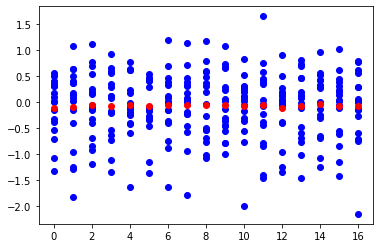

In [162]:
import matplotlib.pyplot as plt
#plot the bar with highlight of mean.
column_mean = np.mean(bootstraps_model_coef, axis=0)
# print(bootstraps_model_coef.shape)
# print("col_mean: ", column_mean.shape)
# print("x axis: ", bootstraps_model_coef[:,1].shape)
# print("y axis: ", bootstraps_model_coef[:,0].shape)

for x in range(17):
  plt.scatter([x] * len(bootstraps_model_coef[:,x]), bootstraps_model_coef[:,x], c='b')
  plt.scatter(x, column_mean[x], c='r')



**Task 2** hypothesis testing

In [163]:
print(bootstraps_input.shape)
print(bootstraps_output.shape)

print(bootstraps_output[0:2])
print(bootstraps_input[0][1])

(200, 100, 17)
(200, 100)
[[0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1
  1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1
  1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0]
 [1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1
  1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1
  0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0]]
[ 0.00441513  0.18506764  0.14177082  0.34431452  0.40314406  0.17405479
  0.17514648  0.47984654 -1.3161461  -0.4218447   0.8653408   0.5403906
  0.12169261  0.49043196  0.25676525  0.14827028  0.02008692]


In [164]:
diff_200_bootstraps = []

for i in range(200): #for every bootstrap dataset, get the male and female input_variables respectively
  male = []
  female = []
  for k in range(100): # seperate males from females, male 1st shape + female 1st shape = 100, 2nd dim = 17
    if(bootstraps_output[i][k])==0: # male
      male.append(bootstraps_input[i][k])
    else: #female
      female.append(bootstraps_input[i][k])
  male = np.array(male)
  female = np.array(female)
  male_mean = np.mean(male, axis = 0) #should have the shape (17,)
  female_mean = np.mean(female, axis = 0) #should have the shape (17,)
  diff_this_boot = female_mean - male_mean
  diff_200_bootstraps.append(diff_this_boot)

diff_200_bootstraps = np.array(diff_200_bootstraps)

In [165]:
print(diff_200_bootstraps.shape)

(200, 17)


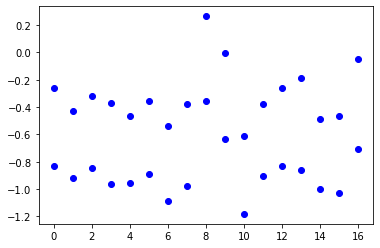

In [166]:
# Use 100 difference? OK I will just choose randomly 100 differences from 200 differences
y = list(range(200))
indices = np.random.choice(y,100,replace=False)

diff_100_bootstraps = diff_200_bootstraps[indices]

five_per = np.percentile(diff_100_bootstraps, 5, axis=0)
ninetyfive_per = np.percentile(diff_100_bootstraps, 95, axis=0)

# print(five_per)
# print(ninetyfive_per)

for x in range(17):
  plt.scatter(x, five_per[x], c='b')
  plt.scatter(x, ninetyfive_per[x], c='b')
  

**Task 3** improve the prediction performance 

In [167]:
train_input = input_variables[:80]
train_output = output_variable[:80]

test_input = input_variables[80:]
test_output = output_variable[80:]
y = list(range(80))
########## use these 80 data to re bootstrap 200 times to get training data!!!!

# bootstraps_input_80 = []
# bootstraps_output_80 = []
bootstraps_model_coef_80 = []
bootstraps_model_intercept_80 = []
bootstarps_model_80 = []
for i in range(200):
  indices = np.random.choice(y,80) #common to choose sample size the same as the original, so each bootstrap should contain 100 samples.
  # print(indices)
  # bootstraps_input_80.append(train_input[indices]) 
  # bootstraps_output_80.append(train_output[indices])
  # print(train_input[indices])
  # print(train_output[indices])
  model = LogisticRegression(C=1.0).fit(train_input[indices],train_output[indices])
  bootstraps_model_coef_80.append(model.coef_)
  bootstraps_model_intercept_80.append(model.intercept_)
  bootstarps_model_80.append(model)

# bootstraps_input_80 = np.array(bootstraps_input_80)
# bootstraps_output_80 = np.array(bootstraps_output_80)
bootstraps_model_coef_80 = np.array(bootstraps_model_coef_80)
bootstraps_model_intercept_80 = np.array(bootstraps_model_intercept_80)

# for i in range(200):
#   bootstarps_model[i] = bootstarps_model[i].fit(train_input,train_output) # retrain all the 200 models

In [168]:
# for each unseen data (each data in test_input), get 200 predictions from the above 200 retrained models

predict_output = []

for input in test_input:
  count_one = 0
  count_zero = 0
  input = input.reshape(1, -1)
  for model in bootstarps_model_80:
    pred = model.predict(input)
    if pred == 1:
      count_one = count_one + 1
    else:
      count_zero = count_zero + 1
  if count_one >= count_zero:
    predict_output.append(1)
  else:
    predict_output.append(0)

count_correct = 0

for i in range(len(test_output)):
  if predict_output[i] == test_output[i]:
    count_correct = count_correct + 1

accuracy = count_correct / len(test_output)   

print(accuracy)

0.75


In [169]:
# trial_model = LogisticRegression(C=1.0).fit(train_input,train_output)
# trial_pred = trial_model.predict(test_input)

# count_correct = 0

# for i in range(len(test_output)):
#   if trial_pred[i] == test_output[i]:
#     count_correct = count_correct + 1

# accuracy = count_correct / len(test_output) 
# # acc = np.sum(trial_pred) / len(test_output)
# print(accuracy) # OK so it is not improving compared to single time trained model, which is weird

**Task 4** identify the model parameters 

In [170]:
bootstraps_model_coef_80 = bootstraps_model_coef_80.squeeze()
# bootstraps_model_coef_80 = np.transpose(bootstraps_model_coef_80)
print(bootstraps_model_coef_80.shape)

(200, 17)


In [171]:
bootstraps_model_coef_ave = np.mean(bootstraps_model_coef_80,axis=0) # average across the 200 model coefficients
bootstraps_model_intercept_ave = np.mean(bootstraps_model_intercept_80,axis=0)

<BarContainer object of 17 artists>

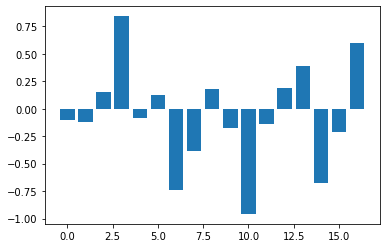

In [172]:
#barplot
plt.bar(list(range(17)), bootstraps_model_coef_ave)

In [173]:
model = LogisticRegression().fit(test_input,test_output)
bootstraps_model_coef_ave = bootstraps_model_coef_ave[np.newaxis,:]
# bootstraps_model_coef_ave = bootstraps_model_coef_ave.transpose()
model.coef_ = bootstraps_model_coef_ave
model.intercept_ = bootstraps_model_intercept_ave
# model.classes_ = [0,1]
test_pred_out = model.predict(test_input)

count_correct = 0
for i in range(len(test_output)):
  if test_pred_out[i] == test_output[i]:
    count_correct = count_correct + 1
accuracy = count_correct / len(test_output) 
print(accuracy)

0.75


**Task 5** cross-validation via out-of-bags evaluation 

In [174]:
y = list(range(100))
# bootstraps_input = []
# bootstraps_output = []
bootstraps_model_coef = []
boot_indices = []
bootstarps_model = []
for i in range(200):
  indices = np.random.choice(y,100) #common to choose sample size the same as the original, so each bootstrap should contain 100 samples.
  # bootstraps_input.append(input_variables[indices]) 
  # bootstraps_output.append(output_variable[indices])
  model = LogisticRegression(C=1.0).fit(input_variables[indices],output_variable[indices])
  bootstraps_model_coef.append(model.coef_)
  boot_indices.append(indices)
  bootstarps_model.append(model)

# bootstraps_input = np.array(bootstraps_input)
# bootstraps_output = np.array(bootstraps_output)
bootstraps_model_coef = np.array(bootstraps_model_coef)

<BarContainer object of 17 artists>

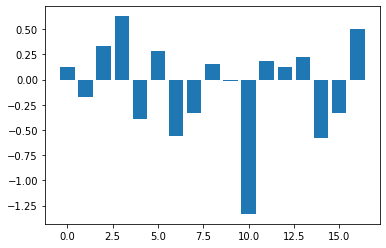

In [175]:
bootstraps_model_coef = bootstraps_model_coef.squeeze()
bootstraps_model_coef_ave = np.mean(bootstraps_model_coef,axis=0)
plt.bar(list(range(17)), bootstraps_model_coef_ave)

In [176]:
# OOB 

accu_list = [] 
for i in range(200):
  unseen_indices = [x for x in y if x not in boot_indices[i]] # all the unseen indices in each bootstrap sample
  unseen_input = input_variables[unseen_indices]
  unseen_output = output_variable[unseen_indices]
  accuracy = np.sum(unseen_output == bootstarps_model[i].predict(unseen_input)) / len(unseen_output)
  accu_list.append(accuracy)

print(accu_list) 
print("Average accuracy across 200 bootstraps: ", np.sum(accu_list)/200)

[0.5428571428571428, 0.7352941176470589, 0.6666666666666666, 0.6842105263157895, 0.6842105263157895, 0.6, 0.6666666666666666, 0.6470588235294118, 0.6764705882352942, 0.7105263157894737, 0.5675675675675675, 0.7714285714285715, 0.6285714285714286, 0.65, 0.7714285714285715, 0.6756756756756757, 0.7222222222222222, 0.6944444444444444, 0.6666666666666666, 0.6585365853658537, 0.6206896551724138, 0.6486486486486487, 0.6285714285714286, 0.631578947368421, 0.7352941176470589, 0.6111111111111112, 0.6097560975609756, 0.71875, 0.6571428571428571, 0.5384615384615384, 0.6410256410256411, 0.625, 0.5294117647058824, 0.6341463414634146, 0.675, 0.53125, 0.5945945945945946, 0.7352941176470589, 0.6944444444444444, 0.7222222222222222, 0.6153846153846154, 0.6571428571428571, 0.7297297297297297, 0.7027027027027027, 0.5555555555555556, 0.6363636363636364, 0.6153846153846154, 0.47058823529411764, 0.7647058823529411, 0.5365853658536586, 0.5882352941176471, 0.6571428571428571, 0.7027027027027027, 0.71428571428571

**Dataset B**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  del sys.path[0]


The only relevant horizontal brain slice has 739 voxels.


/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays.py:1751: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fraction * (x1 - x0), y1 - y0])


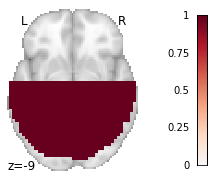

In [177]:
from nilearn import datasets
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn.image import new_img_like
from nilearn.plotting import plot_stat_map
from matplotlib import pylab as plt

haxby_dataset = datasets.fetch_haxby(subjects=1)

mask_filename = haxby_dataset.mask
mask_img = nib.load(mask_filename)
process_mask = mask_img.get_data()

picked_slice = 29
process_mask[..., (picked_slice + 1):] = 0
process_mask[..., :picked_slice] = 0
process_mask[:, 30:] = 0  # zero out anterior “half” of the brain
process_mask_img = new_img_like(mask_img, process_mask)


from nilearn.input_data import NiftiMasker
nifti_masker = NiftiMasker(
    smoothing_fwhm=8,
    mask_img=process_mask_img)
func_filename = haxby_dataset.func[0]
fmri_masked = nifti_masker.fit_transform(func_filename)

labels = pd.read_csv(haxby_dataset.session_target[0], sep=" ")
conditions = labels['labels']
condition_mask = conditions.isin(['face', 'house'])

fmri_masked = fmri_masked[condition_mask]
output_variable = np.array(conditions[condition_mask] == 'face', dtype=np.int)

print('The only relevant horizontal brain slice has %i voxels.' % process_mask[..., picked_slice].sum())

#plot that slice to get an impression of where the input variables are in the brain
plot_stat_map(process_mask_img, cut_coords=[-9], display_mode="z", cmap=plt.cm.RdBu_r)


**Task 6** uncertainty estimation


In [178]:
y = list(range(216))

# take 200 bootstraps using random indices, that way don't have to zip them or anything, just use index to pick the input and output 
bootstraps_input = []
bootstraps_output = []
bootstraps_model_coef = []
# bootstarps_model = []
for i in range(200):
  indices = np.random.choice(y,216) #common to choose sample size the same as the original, so each bootstrap should contain 100 samples.
  bootstraps_input.append(fmri_masked[indices]) 
  bootstraps_output.append(output_variable[indices])
  model = LogisticRegression(C=1.0).fit(fmri_masked[indices],output_variable[indices])
  bootstraps_model_coef.append(model.coef_)
  # bootstarps_model.append(model)

bootstraps_input = np.array(bootstraps_input)
bootstraps_output = np.array(bootstraps_output)
bootstraps_model_coef = np.array(bootstraps_model_coef)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [179]:
bootstraps_model_coef = bootstraps_model_coef.squeeze()

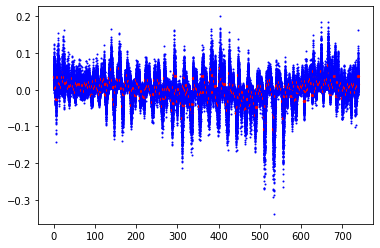

In [180]:
column_mean = np.mean(bootstraps_model_coef, axis=0)
for x in range(739):
  plt.scatter([x] * len(bootstraps_model_coef[:,x]), bootstraps_model_coef[:,x], c='b', s=1)
  plt.scatter(x, column_mean[x], c='r', s=5)

**Task 7** hypothesis testing

In [181]:
diff_200_bootstraps = []

for i in range(200): #for every bootstrap dataset, get the face and house input_variables respectively
  male = []
  female = []
  for k in range(216): # seperate males from females, male 1st shape + female 1st shape = 100, 2nd dim = 17
    if(bootstraps_output[i][k])==0: # male
      male.append(bootstraps_input[i][k])
    else: #female
      female.append(bootstraps_input[i][k])
  male = np.array(male)
  female = np.array(female)
  male_mean = np.mean(male, axis = 0) #should have the shape (739,)
  female_mean = np.mean(female, axis = 0) #should have the shape (739,)
  diff_this_boot = female_mean - male_mean
  diff_200_bootstraps.append(diff_this_boot)

diff_200_bootstraps = np.array(diff_200_bootstraps)

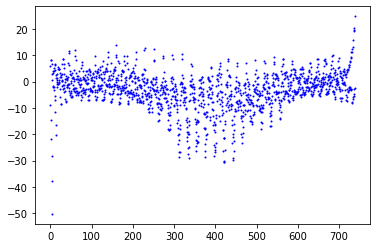

In [182]:
# Use 100 difference? OK I will just choose randomly 100 differences from 200 differences
y = list(range(200))
indices = np.random.choice(y,100,replace=False)

diff_100_bootstraps = diff_200_bootstraps[indices]

five_per = np.percentile(diff_100_bootstraps, 5, axis=0)
ninetyfive_per = np.percentile(diff_100_bootstraps, 95, axis=0)

# print(five_per)
# print(ninetyfive_per)

for x in range(739):
  plt.scatter(x, five_per[x], c='b',s=1)
  plt.scatter(x, ninetyfive_per[x], c='b',s=1)
  

**Task 8** improve the prediction performance

In [183]:
train_input = fmri_masked[:int(len(fmri_masked)*0.8)]
train_output = output_variable[:int(len(output_variable)*0.8)]

test_input = fmri_masked[int(len(fmri_masked)*0.8):]
test_output = output_variable[int(len(fmri_masked)*0.8):]

y = list(range(int(len(fmri_masked)*0.8)))
########## use these 80% data to re bootstrap 200 times to get training data!!!!

bootstraps_model_coef_80 = []
bootstraps_model_intercept_80 = []
bootstarps_model_80 = []
for i in range(200):
  indices = np.random.choice(y,int(len(fmri_masked)*0.8)) 
  model = LogisticRegression(C=1.0).fit(fmri_masked[indices],train_output[indices])
  bootstraps_model_coef_80.append(model.coef_)
  bootstraps_model_intercept_80.append(model.intercept_)
  bootstarps_model_80.append(model)

bootstraps_model_coef_80 = np.array(bootstraps_model_coef_80)
bootstraps_model_intercept_80 = np.array(bootstraps_model_intercept_80)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [184]:
predict_output = []

for input in test_input:
  count_one = 0
  count_zero = 0
  input = input.reshape(1, -1)
  for model in bootstarps_model_80:
    pred = model.predict(input)
    if pred == 1:
      count_one = count_one + 1
    else:
      count_zero = count_zero + 1
  if count_one >= count_zero:
    predict_output.append(1)
  else:
    predict_output.append(0)

count_correct = 0

for i in range(len(test_output)):
  if predict_output[i] == test_output[i]:
    count_correct = count_correct + 1

accuracy = count_correct / len(test_output)   

print(accuracy)

0.7727272727272727


**Task 9** identify the model parameters

<BarContainer object of 739 artists>

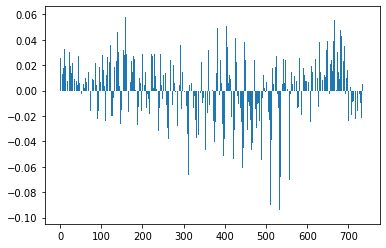

In [185]:
bootstraps_model_coef_80 = bootstraps_model_coef_80.squeeze()
# bootstraps_model_coef_80 = np.transpose(bootstraps_model_coef_80)
# print(bootstraps_model_coef_80.shape)
bootstraps_model_coef_ave = np.mean(bootstraps_model_coef_80,axis=0) # average across the 200 model coefficients
bootstraps_model_intercept_ave = np.mean(bootstraps_model_intercept_80,axis=0)
#barplot
plt.bar(list(range(739)), bootstraps_model_coef_ave)

In [186]:
model = LogisticRegression().fit(test_input,test_output)
bootstraps_model_coef_ave = bootstraps_model_coef_ave[np.newaxis,:]
# bootstraps_model_coef_ave = bootstraps_model_coef_ave.transpose()
model.coef_ = bootstraps_model_coef_ave
model.intercept_ = bootstraps_model_intercept_ave
# model.classes_ = [0,1]
test_pred_out = model.predict(test_input)

count_correct = 0
for i in range(len(test_output)):
  if test_pred_out[i] == test_output[i]:
    count_correct = count_correct + 1
accuracy = count_correct / len(test_output) 
print(accuracy)

0.7727272727272727


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Task 10** cross-validation via out-of-bags evaluation 

In [187]:
y = list(range(216))
# bootstraps_input = []
# bootstraps_output = []
bootstraps_model_coef = []
boot_indices = []
bootstarps_model = []
for i in range(200):
  indices = np.random.choice(y,216) #common to choose sample size the same as the original, so each bootstrap should contain 100 samples.
  # bootstraps_input.append(input_variables[indices]) 
  # bootstraps_output.append(output_variable[indices])
  model = LogisticRegression(C=1.0).fit(fmri_masked[indices],output_variable[indices])
  bootstraps_model_coef.append(model.coef_)
  boot_indices.append(indices)
  bootstarps_model.append(model)

# bootstraps_input = np.array(bootstraps_input)
# bootstraps_output = np.array(bootstraps_output)
bootstraps_model_coef = np.array(bootstraps_model_coef)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


<BarContainer object of 739 artists>

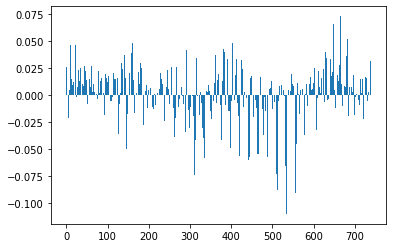

In [188]:
bootstraps_model_coef = bootstraps_model_coef.squeeze()
bootstraps_model_coef_ave = np.mean(bootstraps_model_coef,axis=0)
plt.bar(list(range(739)), bootstraps_model_coef_ave)

In [189]:
# OOB 

accu_list = [] 
for i in range(200):
  unseen_indices = [x for x in y if x not in boot_indices[i]] # all the unseen indices in each bootstrap sample
  unseen_input = fmri_masked[unseen_indices]
  unseen_output = output_variable[unseen_indices]
  accuracy = np.sum(unseen_output == bootstarps_model[i].predict(unseen_input)) / len(unseen_output)
  accu_list.append(accuracy)

print(accu_list) 
print("Average accuracy across 200 bootstraps: ", np.sum(accu_list)/200)

[0.9024390243902439, 0.9375, 0.926829268292683, 0.9759036144578314, 0.9113924050632911, 0.8333333333333334, 0.9125, 0.9605263157894737, 0.9493670886075949, 0.9101123595505618, 0.9012345679012346, 0.9382716049382716, 0.875, 0.9078947368421053, 0.9473684210526315, 0.9642857142857143, 0.9397590361445783, 0.9736842105263158, 0.972972972972973, 0.9342105263157895, 0.96, 0.9259259259259259, 0.9052631578947369, 0.9090909090909091, 0.9222222222222223, 0.9642857142857143, 0.8823529411764706, 0.9493670886075949, 0.9230769230769231, 0.9710144927536232, 0.9583333333333334, 0.9577464788732394, 0.9318181818181818, 0.927710843373494, 0.8928571428571429, 0.9333333333333333, 0.9078947368421053, 0.9761904761904762, 0.948051948051948, 0.8904109589041096, 0.9036144578313253, 0.9487179487179487, 0.95, 0.95, 0.926829268292683, 0.9294117647058824, 0.9545454545454546, 0.9240506329113924, 0.9130434782608695, 0.9487179487179487, 0.9285714285714286, 0.8888888888888888, 0.9493670886075949, 0.95, 0.911392405063291